<a href="https://colab.research.google.com/github/sellaakhilaa/Feature-enginering/blob/main/PCA_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original shape: (150, 4)
Transformed shape (after PCA): (150, 2)
Explained Variance Ratio: [0.72962445 0.22850762]


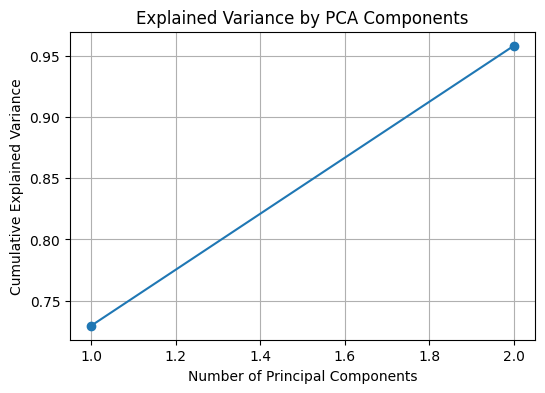

Accuracy after PCA: 0.9333333333333333


In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target
features = iris.feature_names

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.decomposition import PCA

# Initialize PCA: keep 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("Transformed shape (after PCA):", X_pca.shape)

# Explained variance by each principal component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy after PCA:", accuracy_score(y_test, y_pred))

